In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [6]:
import numpy as np

In [7]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

### 编译模型

In [12]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

### 配置优化器

In [13]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001), 
              loss = 'binary_crossentropy',
             metrics = ['accuracy'])

### 使用自定义的损失loss和指标metrics

In [14]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

## 验证你的算法

### 留出验证集

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 训练模型

In [16]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

model.fit()返回了一个History对象.
这个对象有一个成员history,它是一个字典,包含训练过程中的所有数据.

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])

### 绘制训练损失和验证损失

In [18]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = "Training Loss")
plt.plot(epochs, val_loss_values, 'r', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


<Figure size 640x480 with 1 Axes>

### 绘制训练精度和验证精度

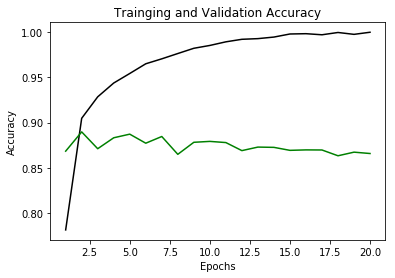

In [21]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'k', label = "Training Accuracy")
plt.plot(epochs, val_acc_values, 'g', label = "Validation Accuracy")
plt.title("Trainging and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

从图中可以看出,训练损失每轮都在降低,训练精度每轮都在提升.
这就是梯度下降优化的预期结果:你想要最小化的量随着每次迭代越来越小.

但是验证损失和验证精度却并非如此,出现了**过拟合**.

在第3轮训练后就可以停止训练了

### 从头开始重新训练一个模型

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.1987 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 2s 85us/step


In [23]:
results

[0.32385535791397096, 0.87308]

In [24]:
model.predict(x_test)

array([[0.13560073],
       [0.9997118 ],
       [0.27816352],
       ...,
       [0.0713997 ],
       [0.04283792],
       [0.47383916]], dtype=float32)